In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [151]:
import matplotlib.font_manager as fm

font_path = r'C:\Users\MIN\Desktop\study\three_weeks_project\coronavirusdataset\NanumFontSetup_TTF_BARUNGOTHIC\NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

In [52]:
df_trend = pd.read_csv(r"./coronavirusdataset/SearchTrend.csv")
df_time = pd.read_csv(r"./coronavirusdataset/Time.csv")

In [4]:
df_trend.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


In [5]:
df_time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [6]:
df_trend.tail()

,date,cold,flu,pneumonia,coronavirus
1608,2020-05-27,0.11326,0.05254,0.13017,3.93397
1609,2020-05-28,0.12081,0.04581,0.13890,5.55656
1610,2020-05-29,0.16454,0.04599,0.11699,4.95803
1611,2020-05-30,0.12208,0.03299,0.09090,3.41698
1612,2020-05-31,0.11990,0.03499,0.08436,3.25944


In [7]:
df_time.tail()

,date,time,test,negative,confirmed,released,deceased
128,2020-05-27,0,852876,820550,11265,10295,269
129,2020-05-28,0,868666,834952,11344,10340,269
130,2020-05-29,0,885120,849161,11402,10363,269
131,2020-05-30,0,902901,865162,11441,10398,269
132,2020-05-31,0,910822,876060,11468,10405,270


In [9]:
df_trend["corona"] = df_trend["coronavirus"] * 100
df_trend

,date,cold,flu,pneumonia,coronavirus,corona
0,2016-01-01,0.11663,0.05590,0.15726,0.00736,0.736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890,0.890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845,0.845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145,1.145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381,1.381
...,...,...,...,...,...,...
1608,2020-05-27,0.11326,0.05254,0.13017,3.93397,393.397
1609,2020-05-28,0.12081,0.04581,0.13890,5.55656,555.656
1610,2020-05-29,0.16454,0.04599,0.11699,4.95803,495.803
1611,2020-05-30,0.12208,0.03299,0.09090,3.41698,341.698


In [10]:
df_trend.shape

(1613, 6)

In [11]:
df_time.shape

(133, 7)

In [12]:
df_trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613 entries, 0 to 1612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1613 non-null   object 
 1   cold         1613 non-null   float64
 2   flu          1613 non-null   float64
 3   pneumonia    1613 non-null   float64
 4   coronavirus  1613 non-null   float64
 5   corona       1613 non-null   float64
dtypes: float64(5), object(1)
memory usage: 75.7+ KB


In [13]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       133 non-null    object
 1   time       133 non-null    int64 
 2   test       133 non-null    int64 
 3   negative   133 non-null    int64 
 4   confirmed  133 non-null    int64 
 5   released   133 non-null    int64 
 6   deceased   133 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 7.4+ KB


In [7]:
# time_trend_merge = pd.merge(df_time, df_trend)
# time_trend_merge

,date,time,test,negative,confirmed,released,deceased,cold,flu,pneumonia,coronavirus,corona
0,2020-01-20,16,1,0,1,0,0,0.19217,0.70343,3.63716,20.69610,206961.0
1,2020-01-21,16,1,0,1,0,0,0.22462,0.59789,4.31987,35.33284,353328.4
2,2020-01-22,16,4,3,1,0,0,0.23808,0.56661,3.66416,29.74474,297447.4
3,2020-01-23,16,22,21,1,0,0,0.30308,0.55625,3.18035,100.00000,1000000.0
4,2020-01-24,16,27,25,2,0,0,0.34689,0.40226,2.48156,86.11541,861154.1
...,...,...,...,...,...,...,...,...,...,...,...,...
128,2020-05-27,0,852876,820550,11265,10295,269,0.11326,0.05254,0.13017,3.93397,39339.7
129,2020-05-28,0,868666,834952,11344,10340,269,0.12081,0.04581,0.13890,5.55656,55565.6
130,2020-05-29,0,885120,849161,11402,10363,269,0.16454,0.04599,0.11699,4.95803,49580.3
131,2020-05-30,0,902901,865162,11441,10398,269,0.12208,0.03299,0.09090,3.41698,34169.8


In [1]:
plt.plot(time_trend_merge["date"], time_trend_merge["test"])
plt.plot(time_trend_merge["date"], time_trend_merge["corona"])
plt.xlabel("date")
plt.ylabel("test_cnt")
plt.show()

NameError: name 'plt' is not defined

In [109]:
# 확진자 리스트와 감염경로 리스트
# 날짜 문자열로 변환
time_time=list(df_time['date'].apply(lambda x: str(x)))
trend_time=list(df_trend['date'].apply(lambda x: str(x)))

In [29]:
type(time_time[0])

str

In [30]:
time_time[0]

'2020-01-20'

In [23]:
time_time[-1]

'2020-05-31'

In [27]:
trend_time[0]

'2016-01-01'

In [64]:
trend_time[-1]

'2020-05-31'

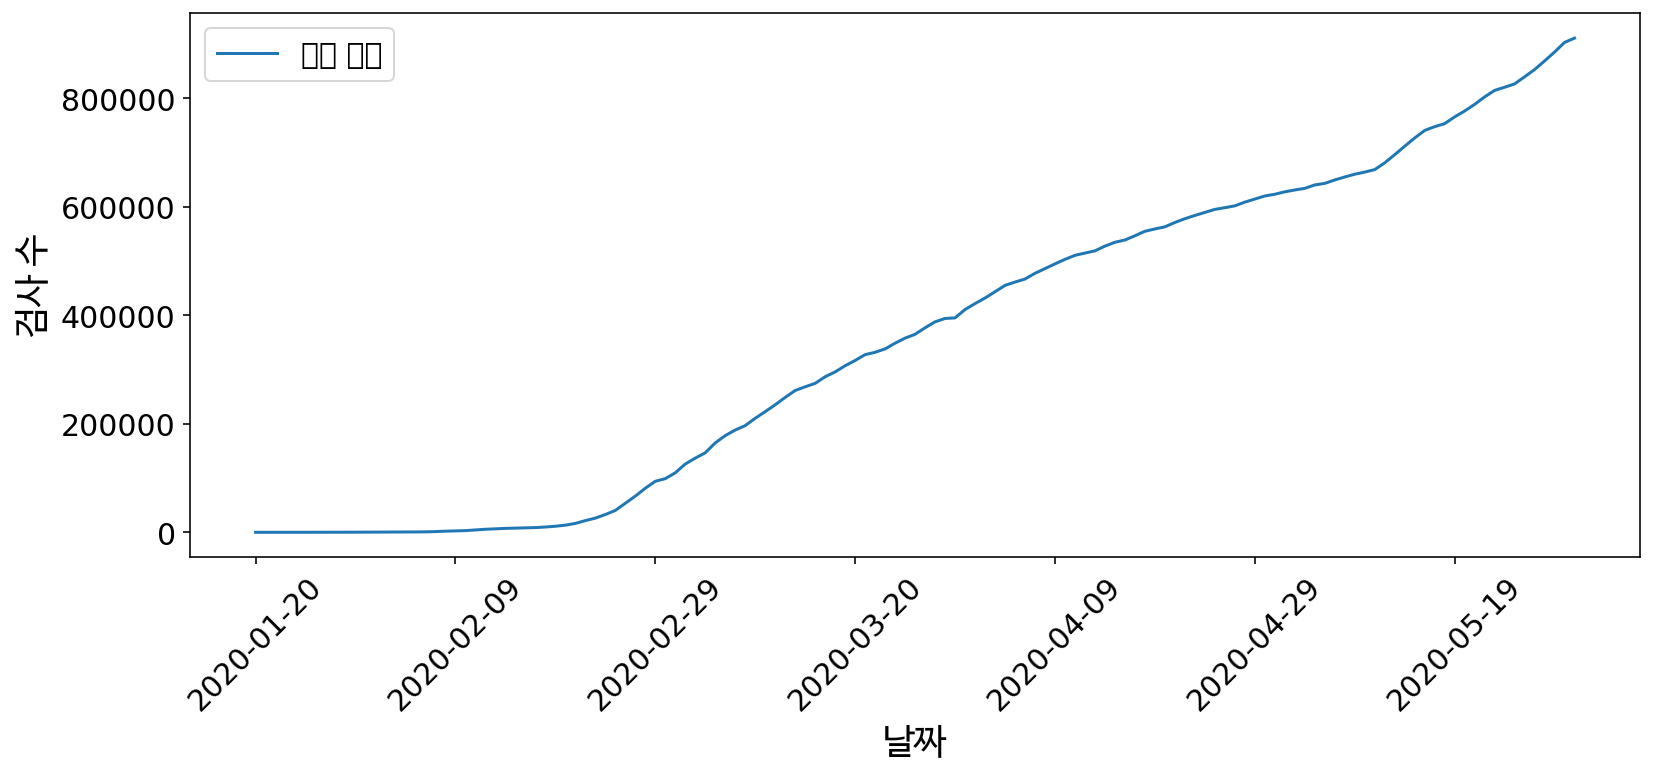

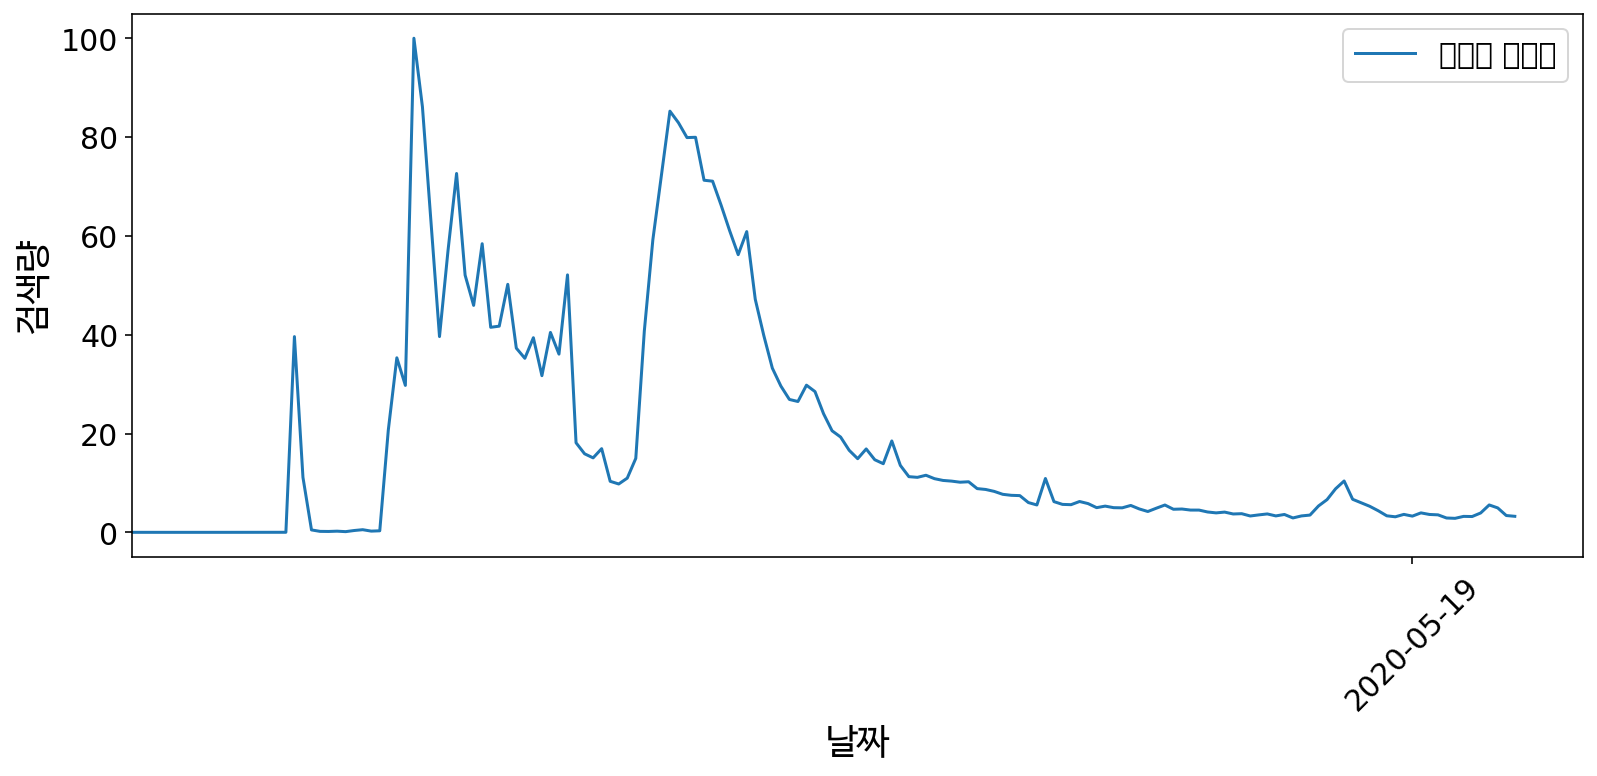

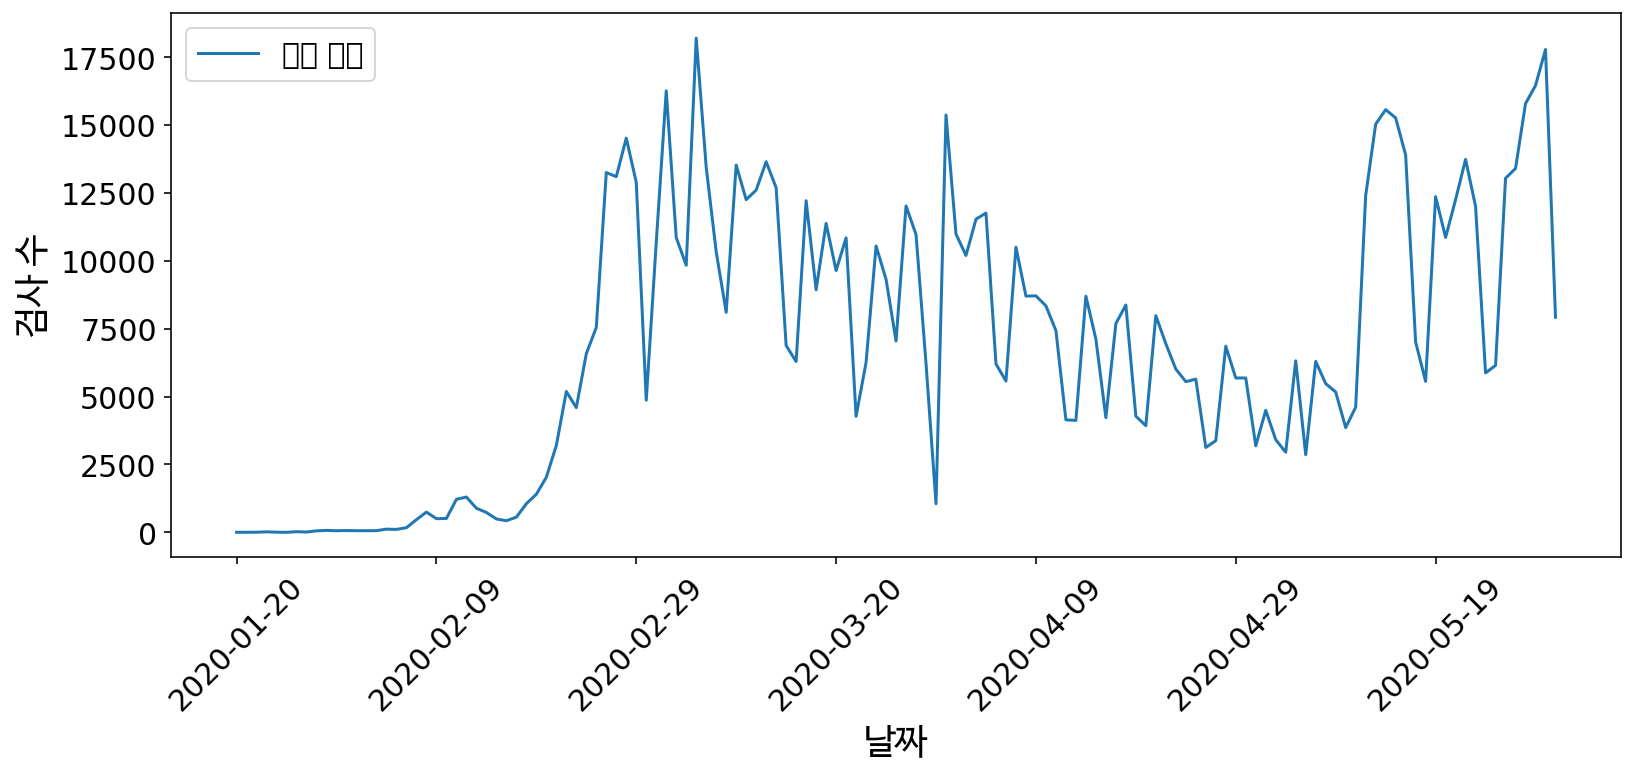

In [154]:
ax1 = df_time.plot(kind="line", x="date", y="test", label="누적 검사", rot=45)
ax1.set_xlabel("날짜", fontsize=10, fontproperties=fontprop)
ax1.set_ylabel("검사 수", fontsize=10, fontproperties=fontprop)

ax2 = df_trend.plot(kind="line", x="date", y="coronavirus", label="키워드 검색량", rot=45)
ax2.set_xlim(1450, 1620)
ax2.set_xlabel("날짜", fontsize=10, fontproperties=fontprop)
ax2.set_ylabel("검색량", fontsize=10, fontproperties=fontprop)

ax3 = df_time.plot(kind="line", x="date", y="test_new", label="신규 검사", rot=45)
ax3.set_xlabel("날짜", fontsize=10, fontproperties=fontprop)
ax3.set_ylabel("검사 수", fontsize=10, fontproperties=fontprop)

# fig, ax = plt.subplots(1, 2,figsize=(15,5))
# ax[0].plot(time_time, df_time["test"])
# ax[1].plot(trend_time, df_trend["coronavirus"])

# # test
# ax[0].set_title("시간에 따른 누적 검사수") 
# ax[0].set_xlabel("날짜") 
# ax[0].set_ylabel("검사 수")

# # trend
# ax[1].set_title("시간에 따른 키워드 검색률") 
# ax[1].set_xlabel("날짜") 
# ax[1].set_ylabel("검색률")
# ax[1].set_xlim(["2020-01-01", "2020-05-31"])

#fig.autofmt_xdate(rotation=45)
plt.show()

In [78]:
test_new_list = []
for i in range(len(df_time['test'])):
    if i == 0:
        test_new_list.append(df_time['test'][0])
    else:
        j = df_time['test'][i] - df_time['test'][i-1]
        test_new_list.append(j)

In [80]:
df_time["test_new"] = test_new_list

In [82]:
df_time

,date,time,test,negative,confirmed,released,deceased,test_new
0,2020-01-20,16,1,0,1,0,0,1
1,2020-01-21,16,1,0,1,0,0,0
2,2020-01-22,16,4,3,1,0,0,3
3,2020-01-23,16,22,21,1,0,0,18
4,2020-01-24,16,27,25,2,0,0,5
...,...,...,...,...,...,...,...,...
128,2020-05-27,0,852876,820550,11265,10295,269,13401
129,2020-05-28,0,868666,834952,11344,10340,269,15790
130,2020-05-29,0,885120,849161,11402,10363,269,16454
131,2020-05-30,0,902901,865162,11441,10398,269,17781
